In [1]:
import numpy as np
from numpy import pi, e
import matplotlib.pyplot as plt
from scipy.optimize import fmin, fsolve
from scipy.special import lambertw as W
from mpl_toolkits.mplot3d import Axes3D

In [9]:
def shell(z): return np.exp(np.exp(1j*z-np.exp(1j*z)))
def reshell(z): return np.real(shell(z))
def imshell(z): return np.imag(shell(z))

extr1 = fmin(lambda x: -reshell(x), x0=1.5, xtol=1e-16, ftol=1e-16)[0]
extr2 = fmin(lambda x: -imshell(x), x0=2, xtol=1e-16, ftol=1e-16)[0]
extr3 = fmin(lambda x: reshell(x), x0=2, xtol=1e-16, ftol=1e-16)[0]
print(reshell(extr1), imshell(extr2), reshell(extr3))

root1 = fsolve(reshell,2.1, xtol=1e-16)[0]
root2 = fsolve(reshell,2.8, xtol=1e-16)[0]
root3 = fsolve(reshell,3.5, xtol=1e-16)[0]
root4 = fsolve(reshell,4.2, xtol=1e-16)[0]
print(imshell(root1), imshell(root2), imshell(root3), imshell(root4))

Optimization terminated successfully.
         Current function value: -2.047791
         Iterations: 53
         Function evaluations: 127
Optimization terminated successfully.
         Current function value: -2.016640
         Iterations: 53
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: -0.380980
         Iterations: 53
         Function evaluations: 119
2.0477905274644037 2.016640219912231 -0.38097972864779234
1.7129360403744176 0.13004847572622097 -0.13004847572622083 -1.7129360403744167


In [5]:
def cis(z): return np.exp(1j*z)
def cis2(z): return cis(z)**cis(z)

# Filling Whole Region

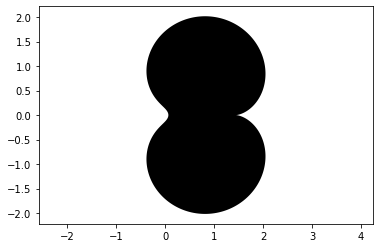

In [3]:
#%matplotlib notebook
t = np.linspace(0, 2*pi, 2**16)
plt.fill_between(reshell(t), imshell(t), facecolor='k')
plt.axis('equal')
plt.show()

# Plotting Boundary of Region

<IPython.core.display.Javascript object>


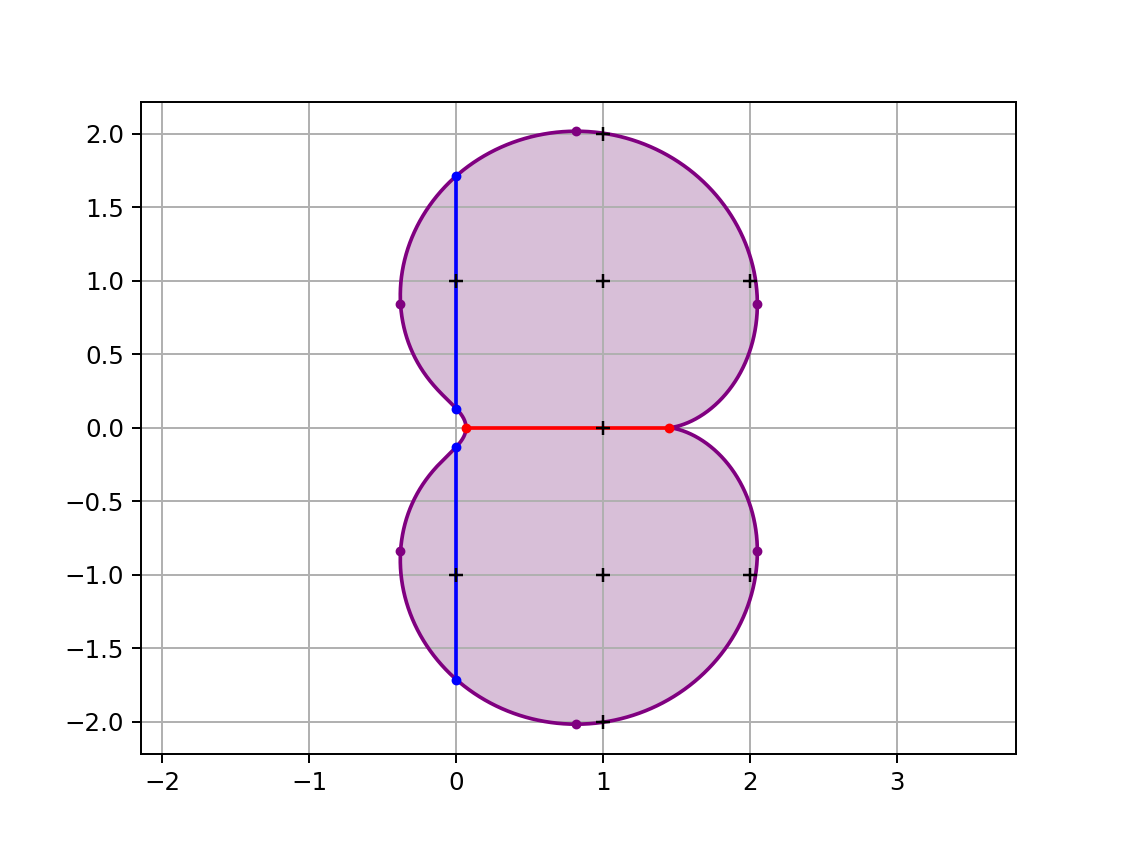

In [15]:
%matplotlib notebook
t = np.linspace(0, 2*pi, 2**16)
plt.plot(reshell(t), imshell(t), c='purple')
#plt.plot(t, np.real(shell(t)))
#plt.plot(t, np.imag(shell(t)))
#plt.plot(np.real(cis2(t)), np.imag(cis2(t)), c='g')

#Purley real boundary points
plt.plot(e**(1/e), 0, 'r.')
plt.plot(e**(-e) , 0, 'r.')

#Purley imaginary boundary points
plt.plot(0, imshell(root1), 'b.')
plt.plot(0, imshell(root2), 'b.')
plt.plot(0, -imshell(root2), 'b.')
plt.plot(0, -imshell(root1), 'b.')

#Boundary extrema
plt.plot(reshell(extr1), imshell(extr1), c='purple', marker='.')
plt.plot(reshell(extr2), imshell(extr2), c='purple', marker='.')
plt.plot(reshell(extr3), imshell(extr1), c='purple', marker='.')
plt.plot(reshell(extr3), -imshell(extr1), c='purple', marker='.')
plt.plot(reshell(extr2), -imshell(extr2), c='purple', marker='.')
plt.plot(reshell(extr1), -imshell(extr1), c='purple', marker='.')

#Gaussian intergers
plt.plot(1,0, c='k', marker='+')
plt.plot(0,1, c='k', marker='+')
plt.plot(0,-1, c='k', marker='+')
plt.plot(1,1, c='k', marker='+')
plt.plot(1,-1, c='k', marker='+')
plt.plot(1,2, c='k', marker='+')
plt.plot(1,-2, c='k', marker='+')
plt.plot(2,1, c='k', marker='+')
plt.plot(2,-1, c='k', marker='+')

#Interger parameters
#plt.plot(reshell(1), imshell(1), c='k', marker='.')
#plt.plot(reshell(2), imshell(2), c='k', marker='.')
#plt.plot(reshell(3), imshell(3), c='k', marker='.')
#plt.plot(reshell(4), imshell(4), c='k', marker='.')
#plt.plot(reshell(5), imshell(5), c='k', marker='.')
#plt.plot(reshell(6), imshell(6), c='k', marker='.')

#Real and imaginary axes
plt.hlines(0, xmin=e**(-np.e), xmax=e**(1/e), color='r')
plt.vlines(0, ymin=imshell(root2), ymax=imshell(root1), color='b')
plt.vlines(0, ymin=-imshell(root2), ymax=-imshell(root1), color='b')
plt.grid()
plt.fill_between(reshell(t), imshell(t), facecolor='thistle')
plt.axis('equal')
#plt.savefig('ThronShell.pdf', bboxes='tight')

plt.show()

In [14]:
reshell(extr1) + 1j*imshell(extr1)

array([0, 1, 2])

In [6]:
def inf(x):
    inf = -W(-np.log(x)) / np.log(x)
    return np.real(inf)
    #if 1/np.e <= x <= np.e:
        #return np.real(inf)
    #else:
        #return 0

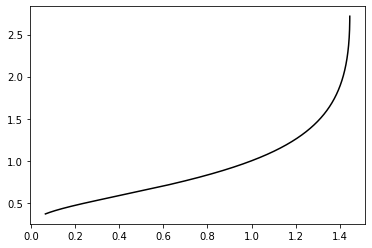

In [7]:
x=np.linspace(e**-e,e**(1/e),num=2**16)
plt.plot(x,inf(x), c='k')

In [8]:
x2=np.linspace(imshell(root2), imshell(root1), num=2**16)
print(x2)

[0.13004848 0.13007263 0.13009678 ... 1.71288773 1.71291189 1.71293604]


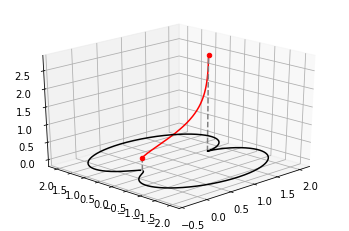

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#z = np.linspace(-2, 2, 100)
x = np.linspace(-3,3,num=2**16)
w = np.linspace(e**-e,e**(1/e),num=2**16)
w2 = np.linspace(0, 1/e, num=2**16)
w3 = np.linspace(0, e, num=2**16)
x2=np.linspace(imshell(root2), imshell(root1), num=2**16)
ax.plot(w, np.zeros(len(w)), inf(w), c='r')
ax.plot(np.ones(len(w2))*e**-e, np.zeros(len(w2)), w2, c='grey', linestyle='--')
ax.plot(np.ones(len(w2))*e**(1/e), np.zeros(len(w2)), w3, c='grey', linestyle='--')
ax.plot(reshell(x), imshell(x), np.zeros(len(x)), c='k')
ax.scatter(e**-e, 0, 1/e, c='r')
ax.scatter(e**(1/e), 0, e, c='r')
###BS
#ax.plot(np.imag(-W(-np.log(x2*1j)) / np.log(x2*1j)), x2, np.real(-W(-np.log(x2*1j)) / np.log(x2*1j)), c='b')
#ax.plot(np.imag(-W(-np.log(x2*1j)) / np.log(x2*1j)), -x2, np.real(-W(-np.log(x2*1j)) / np.log(x2*1j)), c='b')
#ax.scatter(0.360592, 1, 0.4382829,  c='b')
#ax.scatter(-0.360592, -1, 0.4382829,  c='b')

ax.view_init(25, 225)

plt.show()

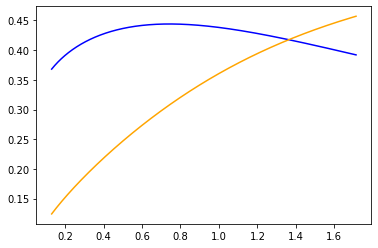

In [10]:
x=np.linspace(imshell(root2), imshell(root1), num=2**16)
plt.plot(x,np.real(-W(-np.log(x*1j)) / np.log(x*1j)), c='b')
plt.plot(x,np.imag(-W(-np.log(x*1j)) / np.log(x*1j)), c='orange')

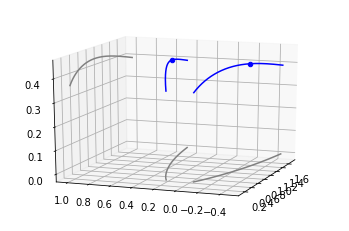

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#z = np.linspace(-2, 2, 100)
x=np.linspace(imshell(root2), imshell(root1), num=2**16)

ax.plot(x, np.imag(-W(-np.log(x*1j)) / np.log(x*1j)), np.real(-W(-np.log(x*1j)) / np.log(x*1j)), c='b')
ax.plot(x, -np.imag(-W(-np.log(x*1j)) / np.log(x*1j)), np.real(-W(-np.log(x*1j)) / np.log(x*1j)), c='b')
#ax.plot(x, np.imag(-W(-np.log(x*1j)) / np.log(x*1j)), np.zeros(len(x)), c='b')
ax.plot(x, np.ones(len(x)), np.real(-W(-np.log(x*1j)) / np.log(x*1j)), c='gray')
ax.plot(x, np.imag(-W(-np.log(x*1j)) / np.log(x*1j)), np.zeros(len(x)), c='gray')
ax.plot(x, -np.imag(-W(-np.log(x*1j)) / np.log(x*1j)), np.zeros(len(x)), c='gray')
#ax.plot(x, np.zeros(len(x)), np.zeros(len(x)), c='k')
ax.scatter(1, 0.360592, 0.4382829,  c='b')
ax.scatter(1, -0.360592, 0.4382829,  c='b')
ax.view_init(15, 200)

plt.show()

In [12]:
def infc(x):
    infc = -W(-np.log(x)) / np.log(x)
    return infc
infc(1j)

(0.4382829367270321+0.3605924718713855j)

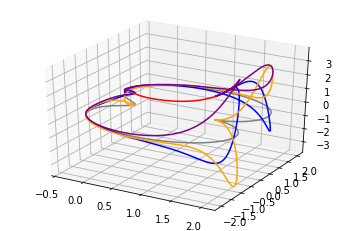

In [13]:
#%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.linspace(imshell(root2), imshell(root1), num=2**16)
t=np.linspace(0, 2*pi, num=2**16)
ax.plot(reshell(t), imshell(t), np.zeros(len(t)), c='gray')

#ax.plot(reshell(t), imshell(t), np.real(infc(shell(t))), c='blue')
ax.plot(reshell(t), imshell(t), np.real(shell(t)**shell(t)), c='blue')
#ax.plot(reshell(t), imshell(t), np.imag(infc(shell(t))), c='orange')
ax.plot(reshell(t), imshell(t), np.imag(shell(t)**shell(t)), c='orange')
# e**np.cos(t) == abs(infc(shell(t)))
#ax.plot(reshell(t), imshell(t), e**np.cos(t), c='purple')
ax.plot(reshell(t), imshell(t), abs(shell(t)**shell(t)), c='purple')
#ax.plot(w, np.zeros(len(w)), inf(w), c='r')
ax.plot(w, np.zeros(len(w)), w**w, c='r')

#Purley imaginary branches
#ax.plot(np.zeros(len(x)), x, np.real(infc(x*1j)), c='blue')
#ax.plot(np.zeros(len(x)), x, np.imag(infc(x*1j)), c='orange')
#ax.plot(np.zeros(len(x)), -x, np.real(infc(x*1j)), c='blue')
#ax.plot(np.zeros(len(x)), -x, -np.imag(infc(x*1j)), c='orange')


#Important points
#ax.scatter(e**(1/e), 0, e, c='r')
#ax.scatter(e**-e, 0, 1/e, c='r')
#ax.scatter(reshell(pi/2), imshell(pi/2), 1, c='purple')


plt.show()

## Absolute Value of the Shell-Thron Boundary Power Tower

<IPython.core.display.Javascript object>


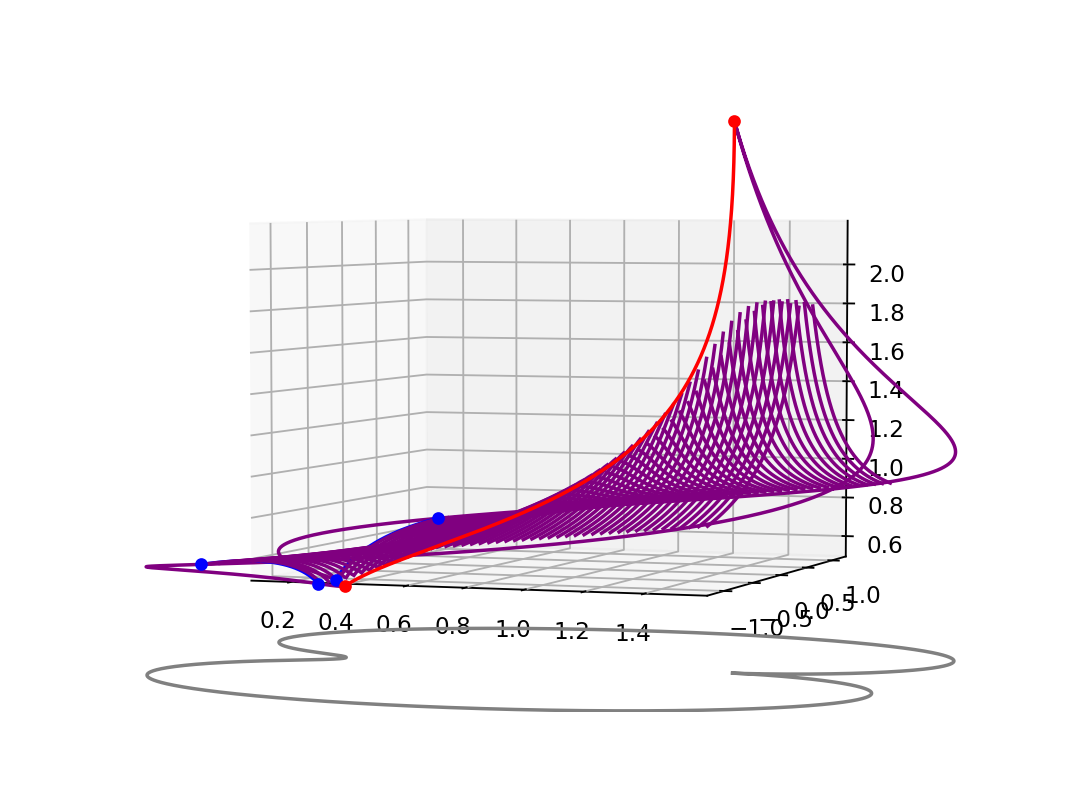

In [40]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.linspace(imshell(root2), imshell(root1), num=2**16)
x0=np.linspace(0, 1.7, num=2**16)
t=np.linspace(0, 2*pi, num=2**16)
ax.plot(reshell(t), imshell(t), np.zeros(len(t)), c='gray')
ax.plot(reshell(t), imshell(t), abs(infc(shell(t))), c='purple')


#Purley imaginary branches
ax.plot(np.zeros(len(x)), x, abs(infc(x*1j)), c='b')
ax.plot(np.zeros(len(x)), -x, abs(infc(x*1j)), c='b')

#Vertical branches loop
d = np.linspace(0.01,1.69,num=60)
for i in range(0, len(d)):
    ax.plot(np.ones(len(x))*d[i], x, abs(infc(d[i] + x*1j)), c='purple')
    ax.plot(np.ones(len(x))*d[i], -x, abs(infc(d[i] + x*1j)), c='purple')

ax.plot(w, np.zeros(len(w)), inf(w), c='r')
 
#Important points
ax.scatter(e**(1/e), 0, e, c='r')
ax.scatter(e**-e, 0, 1/e, c='r')
ax.scatter(0, imshell(root1), abs(infc(shell(root1))), c='b')
ax.scatter(0, imshell(root2), abs(infc(shell(root2))), c='b')
ax.scatter(0, -imshell(root1), abs(infc(shell(root1))), c='b')
ax.scatter(0, -imshell(root2), abs(infc(shell(root2))), c='b')
#ax.scatter(reshell(pi/2), imshell(pi/2), 1, c='purple') #Abs value of infc equals 1 on boundary
#ax.scatter(reshell(3*pi/2), imshell(3*pi/2), 1, c='purple') #Abs value of infc equals 1 on boundary

plt.show()

In [15]:
imshell(root1)

1.7129360403744176

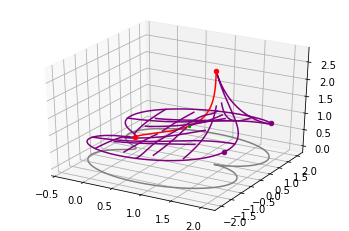

In [16]:
#%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.linspace(imshell(root2), imshell(root1), num=2**16)
t=np.linspace(0, 2*pi, num=2**16)
ax.plot(reshell(t), imshell(t), np.zeros(len(t)), c='gray')
ax.plot(reshell(t), imshell(t), abs(infc(shell(t))), c='purple')
ax.plot(w, np.zeros(len(w)), inf(w), c='r')

#Purley imaginary branches
ax.plot(np.zeros(len(x)), x, abs(infc(x*1j)), c='purple')
ax.plot(np.zeros(len(x)), -x, abs(infc(x*1j)), c='purple')

#Extrema branches
xextr1 = np.linspace(reshell(extr3), reshell(extr1), num=2**16)
ax.plot(xextr1, np.ones(len(xextr1))*imshell(extr1), abs(infc(xextr1 + imshell(extr1)*1j)), c='purple')
ax.plot(xextr1, -np.ones(len(xextr1))*imshell(extr1), abs(infc(xextr1 + imshell(extr1)*1j)), c='purple')
xextr2 = np.linspace(-imshell(extr2), imshell(extr2), num=2**16)
ax.plot(np.ones(len(xextr2))*reshell(extr2), xextr2, abs(infc(reshell(extr2) + imshell(xextr2)*1j)), c='purple')
#ax.plot(np.ones(len(xextr2))*reshell(extr2), xextr2, xextr2, c='purple')

#Important points
ax.scatter(1,0,1,c='g', marker='.')
ax.scatter(e**(1/e), 0, e, c='r')
ax.scatter(e**-e, 0, 1/e, c='r')
ax.scatter(reshell(pi/2), imshell(pi/2), 1, c='purple') #Abs value of infc equals 1 on boundary
ax.scatter(reshell(3*pi/2), imshell(3*pi/2), 1, c='purple') #Abs value of infc equals 1 on boundary


#Other branches
ax.plot(np.ones(len(x)), x, abs(infc(1 + x*1j)), c='purple')
ax.plot(np.ones(len(x)), -x, abs(infc(1 + x*1j)), c='purple')
ax.plot(np.ones(len(x))*0.5, x, abs(infc(0.5 + x*1j)), c='purple')
ax.plot(np.ones(len(x))*0.5, -x, abs(infc(0.5 + x*1j)), c='purple')
ax.plot(np.ones(len(x))*1.5, x, abs(infc(1.5 + x*1j)), c='purple')
ax.plot(np.ones(len(x))*1.5, -x, abs(infc(1.5 + x*1j)), c='purple')
ax.plot(w, np.ones(len(w)), abs(infc(w + 1j)), c='purple')
ax.plot(w, -np.ones(len(w)), abs(infc(w + 1j)), c='purple')
ax.plot(w, np.ones(len(w))*0.5, abs(infc(w + 0.5j)), c='purple')
ax.plot(w, -np.ones(len(w))*0.5, abs(infc(w + 0.5j)), c='purple')

plt.show()

In [17]:
e**(1/e)

1.444667861009766

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in power
  del sys.path[0]
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


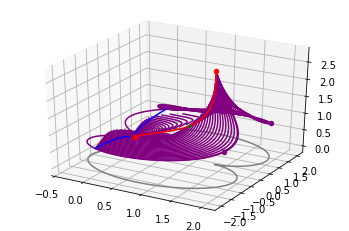

In [18]:
#%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
x=np.linspace(imshell(root2), imshell(root1), num=2**16)
t=np.linspace(0, 2*pi, num=2**16)
#Shadow
ax.plot(reshell(t), imshell(t), np.zeros(len(t)), c='gray')
#Boundary
ax.plot(reshell(t), imshell(t), abs(infc(shell(t))), c='purple')

d = np.linspace(0.01,.99, num=30)
for i in range(0,len(d)):
    xd = reshell(t)**d[i]
    yd = imshell(t)**d[i]
    zd = abs(infc((shell(t)**d[i])))
    ax.plot(xd, yd, zd, c='purple')
    ax.plot(xd, -yd, zd, c='purple')

#Real Branch
ax.plot(w, np.zeros(len(w)), inf(w), c='r')

#Purley imaginary branches
ax.plot(np.zeros(len(x)), x, abs(infc(x*1j)), c='b')
ax.plot(np.zeros(len(x)), -x, abs(infc(x*1j)), c='b')

#Important points
ax.scatter(1,0,1,c='g', marker='.')
ax.scatter(e**(1/e), 0, e, c='r')
ax.scatter(e**-e, 0, 1/e, c='r')
ax.scatter(reshell(pi/2), imshell(pi/2), 1, c='purple') #Abs value of infc equals 1 on boundary
ax.scatter(reshell(3*pi/2), imshell(3*pi/2), 1, c='purple') #Abs value of infc equals 1 on boundary

plt.show()

<IPython.core.display.Javascript object>


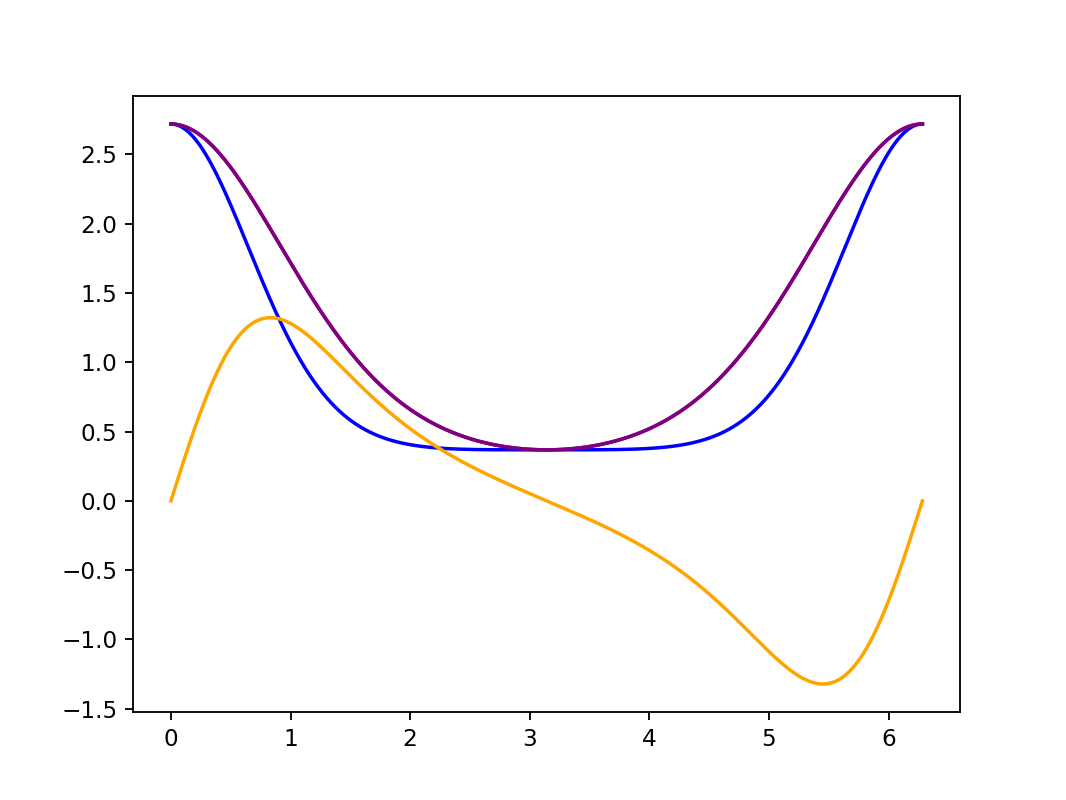

In [44]:
t=np.linspace(0, 2*pi, num=2**16)
plt.plot(t, np.real(infc(shell(t))), c='blue')
plt.plot(t, np.imag(infc(shell(t))), c='orange')
plt.plot(t, abs(infc(shell(t))), c='purple')
#plt.plot(t, e**np.cos(t), c='purple')
plt.show()

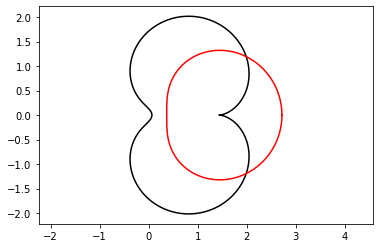

In [20]:
plt.plot(reshell(t), imshell(t), color='k')
plt.plot(np.real(infc(shell(t))), np.imag(infc(shell(t))), c='r')
plt.axis('equal')
#This plot is the same as the plot in the below section. I created the two in different ways. Why are they the same?
plt.show()

# Plotting "the location of the fixed points"

In [21]:
def cres(z): return np.exp(np.exp(1j*z))
def recres(z): return np.real(cres(z))
def imcres(z): return np.imag(cres(z))

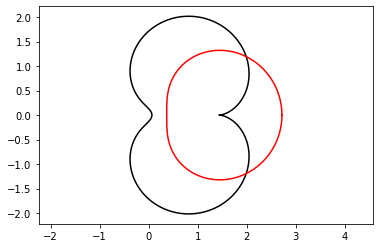

In [22]:
t = np.linspace(0, 2*pi, 2**16)
plt.plot(reshell(t), imshell(t), color='k')
plt.plot(recres(t), imcres(t), color='r')
plt.axis('equal')
plt.show()

In [23]:
shell(pi/2)
infc(shell(pi/2))

(0.5403023058681395+0.8414709848078965j)

In [24]:
fixedt_r = 1.98933
fixedt_i = 1.19328*1j
abs(infc(fixedt_r + fixedt_i))

1.0000004327013483

In [25]:
imshell(extr3)

0.899700203706343

In [26]:
def shell2(z): return np.exp(np.exp(1j*z+np.exp(1j*z)))
def reshell2(z): return np.real(shell2(z))
def imshell2(z): return np.imag(shell2(z))

(-2.432760762073055,
 15.991739527362705,
 -11.025900480924614,
 11.025900480924616)

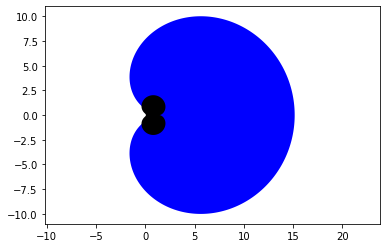

In [27]:
t = np.linspace(0, 2*np.pi, 2**16)
plt.fill_between(reshell2(t), imshell2(t), facecolor='b')
plt.fill_between(reshell(t), imshell(t), facecolor='k')
plt.axis('equal')
#plt.show()

In [28]:
def keynum(t):
    Re = reshell(t)
    Im = imshell(t)
    Ab = abs(shell(t))
    Reh = np.exp(np.cos(t)) * np.cos(np.sin(t))
    Imh = np.exp(np.cos(t)) * np.sin(np.sin(t))
    Abh = np.exp(np.cos(t))
    print('t   = ' + '%.12f'% t)
    print('Re  = ' + '%.12f'% Re)
    print('Im  = ' + '%.12f'% Im)
    print('Ab  = ' + '%.12f'% Ab)
    print('Reh = ' + '%.12f'% Reh)
    print('Imh = ' + '%.12f'% Imh)
    print('Abh = ' + '%.12f'% Abh)

In [33]:
Omega = W(1)
omega = np.real(infc(1/np.sqrt(2)))
keynum(root1)

t   = 2.102594781946
Re  = -0.000000000000
Im  = 1.712936040374
Ab  = 1.712936040374
Reh = 0.392063548460
Imh = 0.457154319770
Abh = 0.602249033304


In [39]:
e**np.cos(root1)

0.6022490333035154

In [37]:
2*np.sin(root1-np.sin(root1))/pi

0.6022490333035155